# 自定义去停用词
## 1.文本信息的正则清洗
## 2.结巴中文分词
## 3.中文分词词性解读
## 4.根据词性规划构建自定义停用词

In [1]:
import re
import jieba
import sys
import matplotlib
from nltk import *
from matplotlib import rcParams
from matplotlib.font_manager import findfont, FontProperties, _rebuild

_rebuild()
# matplotlib.rcParams['axes.unicode_minus'] = False 
# matplotlib.rcParams['font.sans-serif'] = ['SimHei']
# matplotlib.rcParams['font.family'] ='sans-serif'
# matplotlib.matplotlib_fname()

In [2]:
matplotlib.rcParams['font.serif']

['DejaVu Serif',
 'Bitstream Vera Serif',
 'Computer Modern Roman',
 'New Century Schoolbook',
 'Century Schoolbook L',
 'Utopia',
 'ITC Bookman',
 'Bookman',
 'Nimbus Roman No9 L',
 'Times New Roman',
 'Times',
 'Palatino',
 'Charter',
 'serif']

In [3]:
# 读取文本信息
def readFile(path):
    str_doc = ""
    with open(path, 'r', encoding='utf-8') as f:
              str_doc = f.read()
    return str_doc

In [4]:
# 正则对字符串清洗
def textParse(str_doc):
    # 去掉字符
    str_doc = re.sub('\u3000', '', str_doc)
    # 去除空格
    str_doc = re.sub('\s+', ' ', str_doc)
    # 去除换行符
    str_doc= re.sub('[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', " ", str_doc)
    # 正则过滤掉特殊符号,标点,英文,数字...
    r1 = '[a-zA-Z0-9]+'
    str_doc = re.sub(r1, "", str_doc)
    return str_doc
    

In [5]:
def get_stop_words(path=r'./停用词.txt'):
    file = open(path, 'r', encoding='utf-8').read().split('\n')
    return set(file)

In [6]:
def rm_tokens(words, stwlist):
    words_list = list(words)
    stop_words = stwlist
    for i in range(words_list.__len__())[::-1]:
        # 去除停用词
        if words_list[i] in stop_words:
            words_list.pop(i)
        # 去除数字
        elif words_list[i].isdigit():
            words_list.pop(i)
        # 去除单个字符
        elif len(words_list[i]) == 1:
            words_list.pop(i)
        # 去除空格
        elif words_list[i] == " ":
            words_list.pop(i)
    return words_list

In [7]:
def seg_doc(str_doc):
    # 1.处理原文本
    sent_list = str_doc.split('\n')
    sent_list = map(textParse, sent_list)
    # 2.获取停用词
    stwlist = get_stop_words()
    # 3.分词并去除停用词
    word_2dlist = [rm_tokens(jieba.cut(part, cut_all=False), stwlist) for part in sent_list]
    # 4. 合并列表
    word_list = sum(word_2dlist, [])
#     print(sent_list)
    return word_list

In [8]:
def nltk_wf_feature(word_list=None):
    # 方法一: 得到的关键词和词频不是一一对应的
    fdist = FreqDist(word_list)
#     print(fdist.keys(), "\n", fdist.values(), "\n")
    
    # 查看指定词语词频
    w = "陈奕迅"
    print(w, "Frequency: ", fdist.freq(w))
    print(w, "Num of app: ", fdist[w])
    
    # 频率分布表
    print('='*3, "频率分布表", '='*3)
    fdist.tabulate(10)
    
    print('='*3, "频率分布图", '='*3)
    fdist.plot(30)
    
    # 解决中文显示问题
    # 1.查看当前字体
    # 2.更换字体库

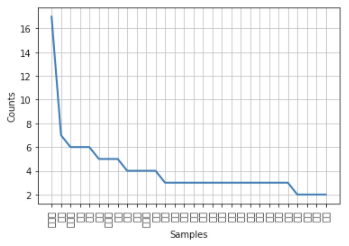

需要解决中文显示问题

In [9]:
def nltk_wf_feature2(word_list=None):
    # 方法二: 
    from collections import Counter
    words = Counter(word_list)
    print(words.keys(), "\n", words.values())
    print("------根据字符长度------")
    wlist = [w for w in words if len(w) > 2]
    print(wlist)

陈奕迅 Frequency:  0.02768729641693811
陈奕迅 Num of app:  17
=== 频率分布表 ===
陈奕迅  父亲 音乐会  音乐  红馆  香港 演唱会  首歌  中年  单车 
 17   7   6   6   6   5   5   5   4   4 
=== 频率分布图 ===


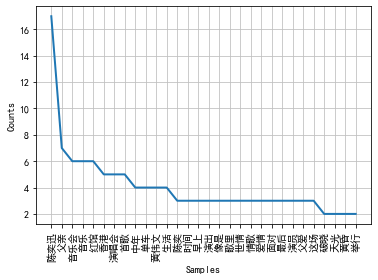

In [11]:
if __name__ == '__main__':
    path = r'./从日出到日落，陈奕迅唱的不只是爱情 从日出到日落，陈奕迅唱的不只是爱情.txt'
    str_doc = readFile(path)
#     print(str_doc)
#     print("-----------------------------------------\n")
#     print(textParse(str_doc))
    word_list = seg_doc(str_doc)
#     print(word_list)
    nltk_wf_feature(word_list)
#     nltk_wf_feature2(word_list)